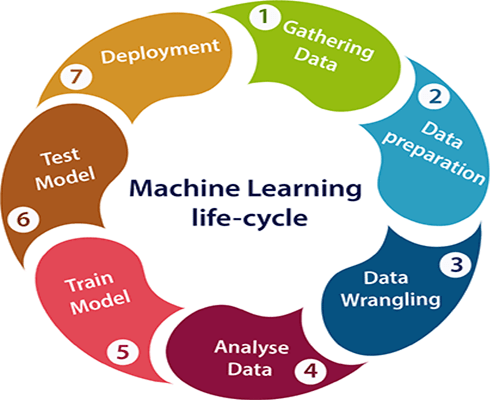

# data Gathering & preprocessing





Loading data from a file:

In [ ]:
import pandas as pd

data = pd.read_csv('data.csv')

**Handling missing data:**

In [ ]:
# drop rows with missing values
data.dropna(inplace=True)

# fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)


**Encoding categorical variables:**

In [ ]:
# create dummy variables for categorical variables
data = pd.get_dummies(data, columns=['color'])

# label encoding for ordinal categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['size'] = le.fit_transform(data['size'])


**Scaling numerical variables:**


In [ ]:
# standardize data to have mean=0 and variance=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['age', 'income']] = scaler.fit_transform(data[['age', 'income']])

# normalize data to have values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['age', 'income']] = scaler.fit_transform(data[['age', 'income']])


**Handling outliers:**

In [ ]:
# remove outliers using z-score
from scipy import stats
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

# winsorize outliers to a specified percentile
from scipy.stats.mstats import winsorize
data['income'] = winsorize(data['income'], limits=[0.05, 0.05])


# **Data wrangling**

Data wrangling, also known as data munging, is the process of cleaning, transforming, and reshaping data into a format that is suitable for analysis. Here are some common data wrangling steps and corresponding Python codes using the Pandas library:

**renaming columns **

In [ ]:
# rename a single column
data.rename(columns={'old_name': 'new_name'}, inplace=True)

# rename multiple columns
data.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'}, inplace=True)


**Removing duplicates:**

In [ ]:
import pandas as pd

data = pd.read_csv('data.csv')

# remove duplicates based on all columns
data.drop_duplicates(inplace=True)

# remove duplicates based on a specific column
data.drop_duplicates(subset=['column_name'], inplace=True)


**Filtering rows:**

In [ ]:
# filter rows based on a condition
filtered_data = data[data['age'] > 25]

# filter rows based on multiple conditions
filtered_data = data[(data['age'] > 25) & (data['income'] > 50000)]

# filter rows based on a list of values
filtered_data = data[data['color'].isin(['red', 'green', 'blue'])]


**Handling missing data:**

In [ ]:
# drop rows with missing values
data.dropna(inplace=True)

# fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)


**Aggregating data:**

In [ ]:
# group data by a categorical variable and compute mean for each group
grouped_data = data.groupby(['category'])['value'].mean().reset_index()

# group data by a categorical variable and compute multiple summary statistics for each group
grouped_data = data.groupby(['category']).agg({'value': ['mean', 'median', 'max', 'min']}).reset_index()


**Pivot tables:**

In [ ]:
# create a pivot table to summarize data by multiple variables
pivot_table = data.pivot_table(index=['category'], columns=['year'], values='value', aggfunc='sum')


# **Data analysis **

In [ ]:
Data analysis refers to the process of using statistical methods and models to gain insights and draw conclusions from data.
 Here are some common data analysis steps and their corresponding Python code 
 using various libraries such as Pandas, NumPy, Matplotlib, and Scikit-learn:

**Descriptive statistics:**

In [ ]:
import pandas as pd

data = pd.read_csv('data.csv')

# calculate summary statistics
summary_stats = data.describe()

# calculate correlation matrix
corr_matrix = data.corr()


**Data visualization:**

In [ ]:
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(data['age'], data['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

# create a histogram
plt.hist(data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# create a bar chart
counts = data['category'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts')


**Hypothesis testing:**

In [ ]:
from scipy.stats import ttest_ind

# perform a t-test for two independent samples
group1 = data[data['category'] == 'A']['value']
group2 = data[data['category'] == 'B']['value']
t_stat, p_value = ttest_ind(group1, group2)


**Machine learning modeling:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('data.csv')

# split data into training and test sets
X = data[['age', 'income']]
y = data['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)


# **Training a model**

Training a model involves using a machine learning algorithm to learn patterns and relationships in the data, and create a model that can make predictions on new data. Here are the general steps for training a model and their corresponding Python code using Scikit-learn:

**Splitting data into training and test sets:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data.csv')

# split data into training and test sets
X = data[['feature1', 'feature2', ...]]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Preprocessing the data:**

In [ ]:
from sklearn.preprocessing import StandardScaler

# standardize the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# apply the same transformation to the test data
X_test = scaler.transform(X_test)


**Choosing and training a model:**

In [ ]:
from sklearn.linear_model import LinearRegression

# initialize a linear regression model
model = LinearRegression()

# train the model on the training data
model.fit(X_train, y_train)


**Evaluating the model on the test set:**

In [ ]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)


**Tuning the model hyperparameters:**

In [ ]:
from sklearn.model_selection import GridSearchCV

# define a grid of hyperparameters to search over
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# use the best hyperparameters to train the final model
model = grid_search.best_estimator_
model.fit(X_train, y_train)


# **Testing a trained model**  

Testing a trained model involves using it to make predictions on a new dataset and evaluating its performance. Here are the general steps for testing a model and their corresponding Python code using Scikit-learn:

**Loading the test data:**

In [ ]:
import pandas as pd

test_data = pd.read_csv('test_data.csv')


**Preprocessing the test data:**

In [ ]:
from sklearn.preprocessing import StandardScaler

# standardize the test data using the same scaler as the training data
X_test = scaler.transform(test_data[['feature1', 'feature2', ...]])


**Making predictions with the trained model:**

In [ ]:
# make predictions on the test data using the trained model
y_pred = model.predict(X_test)


**Evaluating the model's performance on the test set:**

In [ ]:
from sklearn.metrics import mean_squared_error

# evaluate model performance using mean squared error
mse = mean_squared_error(test_data['target'], y_pred)


**Visualizing the model's performance:**

In [ ]:
import matplotlib.pyplot as plt

# create a scatter plot of predicted vs actual values
plt.scatter(test_data['target'], y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
